<a href="https://colab.research.google.com/github/Fazloussatter/Financial-Text-Sentiment-Analysis-of-Google-using-Hugging-Face.ipynb/blob/main/Financial_Text_Sentiment_Analysis_of_Google_using_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing transformers Feedparse request package

In [97]:
%pip install transformers Feedparser requests

#Importing essential package and module

In [98]:
import numpy as np
import pandas as pd

In [99]:
import feedparser
from transformers import pipeline

pipe = pipeline(task="text-classification", model="ProsusAI/finbert")

print(pipe("Stocks rallied and Euro gained"))


Device set to use cpu


[{'label': 'positive', 'score': 0.7318203449249268}]


In [100]:
ticker="GOOG"
keyword="Google"
pipe = pipeline(task="text-classification", model="ProsusAI/finbert")

rss_url=f' http://finance.yahoo.com/rss/headline?s={ticker}'
feed = feedparser.parse(rss_url)

num_articles_to_process = 200

total_score=0
num_articles=0

for i, entry in enumerate(feed.entries):
    if keyword.lower() not in entry.summary.lower():
      continue

    print (f'Title: {entry.title}')
    print (f'Link: {entry.link}')
    print(f'Published: {entry.published}')
    print(f'Summary: {entry.summary}')

    sentiment = pipe(entry.summary)[0]
    print(f'sentiment{sentiment["label"]},score{sentiment["score"]}')

    print('-*50')
    if sentiment['label'] == 'positive':
        total_score += sentiment['score']
        num_articles+=1
    elif sentiment["label"] == "negative":
        total_score -= sentiment["score"]
        num_articles += 1

if num_articles > 0:
   final_score=total_score/num_articles
   print(f'Overall sentiment:{"Positive" if total_score>=-0.15 else "Negative" if total_score<=-0.15 else "Neutral"} {final_score}')
else:
    print(f"No articles found for {keyword} with the specified keyword.")

Device set to use cpu


Title: Google Invests in Nuclear Fusion with Power Purchase Agreement for Virginia Plant
Link: https://finance.yahoo.com/news/google-invests-nuclear-fusion-power-065339574.html?.tsrc=rss
Published: Fri, 04 Jul 2025 06:53:39 +0000
Summary: Alphabet Inc. (NASDAQ:GOOGL) is one of the high profit margin stocks to buy now. On June 30, Google announced an investment in nuclear fusion, which is a power source not yet successfully deployed globally. The tech giant revealed plans to purchase 200 megawatts of power from a proposed nuclear fusion plant in Chesterfield County, Virginia, […]
sentimentneutral,score0.675880491733551
-*50
Title: Alphabet Breakup Could Unleash Cloud Growth -- Analyst Calls It a 'Top Pick'
Link: https://finance.yahoo.com/news/alphabet-breakup-could-unleash-cloud-193057100.html?.tsrc=rss
Published: Thu, 03 Jul 2025 19:30:57 +0000
Summary: Google Cloud Touted as Hidden Giant in Alphabet Split Call
sentimentneutral,score0.7736588716506958
-*50
Title: Google Hit With $314M 

#Visualizing the overall sentiment

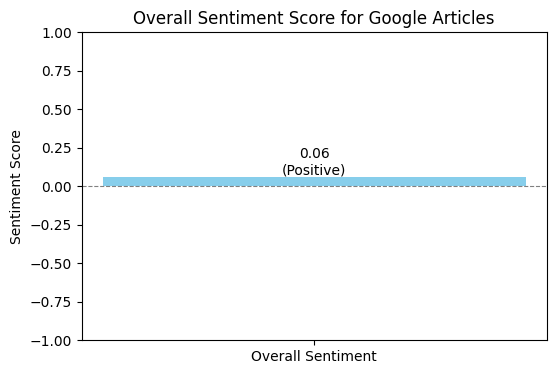

In [101]:

if 'final_score' in locals():
    sentiment_label = "Positive" if total_score >= -0.15 else "Negative" if total_score <= -0.15 else "Neutral"

    # Create a simple bar plot for the overall sentiment score
    plt.figure(figsize=(6, 4))
    plt.bar(['Overall Sentiment'], [final_score], color=['skyblue'])
    plt.ylabel('Sentiment Score')
    plt.title(f'Overall Sentiment Score for {keyword} Articles')
    plt.ylim([-1, 1]) # Sentiment scores are typically between -1 and 1
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for reference
    plt.text(0, final_score, f'{final_score:.2f}\n({sentiment_label})', ha='center', va='bottom')
    plt.show()
else:
    print("Could not create plot: No sentiment analysis was performed (no articles found or processed).")


#Visualizing the percentage of positive, negative and neutral respectively.

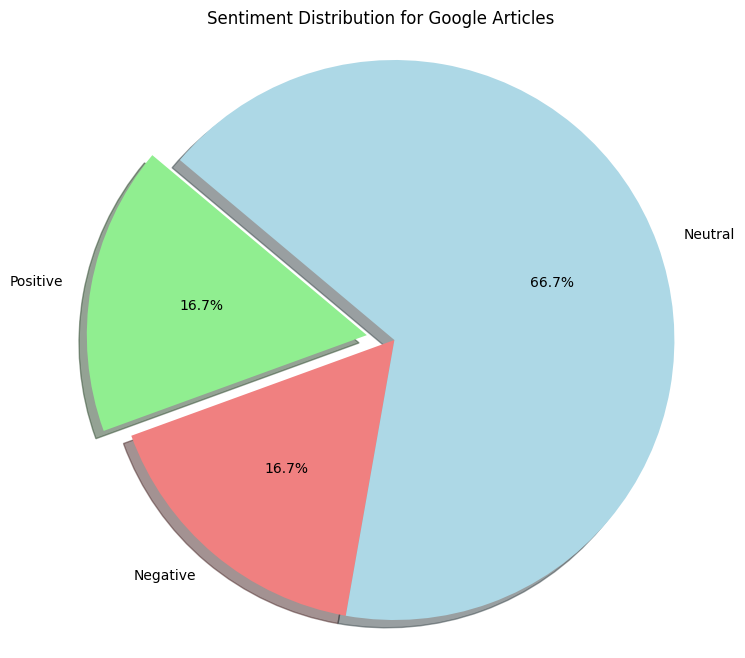

In [102]:

# Calculate percentages
total_articles_processed = sum(sentiment_counts.values())
if total_articles_processed > 0:
    positive_percentage = (sentiment_counts['positive'] / total_articles_processed) * 100
    negative_percentage = (sentiment_counts['negative'] / total_articles_processed) * 100
    neutral_percentage = (sentiment_counts['neutral'] / total_articles_processed) * 100
else:
    positive_percentage = 0
    negative_percentage = 0
    neutral_percentage = 0

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['lightgreen', 'lightcoral', 'lightblue']
explode = (0.1, 0, 0)  # explode the 'Positive' slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Sentiment Distribution for {keyword} Articles')
plt.show()